<a href="https://colab.research.google.com/github/Vamsee27/AAI-627/blob/main/KNN_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Example

In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()

In [ ]:
#convert to a dataframe

df = pd.DataFrame(data.data, columns = data.feature_names)
df.info()

#create the species column

df['Species'] = data.target

#replace this with the actual names

target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
#Preprocessing of Dataset

x = df.drop(columns="Species")
y = df["Species"]
feature_names = x.columns
labels = y.unique()

In [ ]:
#Train/Test Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Make Prediction

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
#Evaluation of Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        12
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
error = []

from sklearn import metrics
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_test)
    error.append(metrics.accuracy_score(y_test, pred_i))

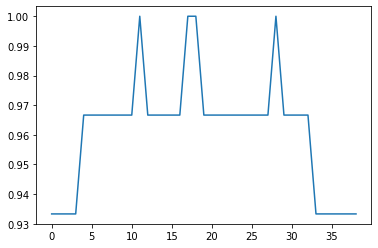

In [ ]:
from matplotlib import pyplot as plt
plt.plot(error)
plt.show()